# Get Data
The following query consists of 10 subqueries to retrieve first, second until tenth most common disease. Afterwards the result set is joined with the age groups.

In [1]:
import pyhdb
import yaml
import pandas as pd

with open('../credentials.yml', 'r') as f:
    credentials = yaml.load(f)
    
connection = pyhdb.connect(**credentials)
cursor = connection.cursor()

# Task 1
query = \
'''
SELECT first.agegroup as AgeGroup, first.total as "1", second.total as "2", third.total as "3", fourth.total as "4", fivth.total as "5", sixth.total as "6", seventh.total as "7", eigth.total as "8", ninth.total as "9", tenth.total as "10"
FROM
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 1) ORDER BY "TOTAL" ASC)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as first
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 2) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as second
ON first.agegroup=second.agegroup
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 3) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as third
ON first.agegroup=third.agegroup
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 4) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as fourth
ON first.agegroup=fourth.agegroup
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 5) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as fivth
ON first.agegroup=fivth.agegroup
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 6) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as sixth
ON first.agegroup=sixth.agegroup
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 7) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as seventh
ON first.agegroup=seventh.agegroup
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 8) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as eigth
ON first.agegroup=eigth.agegroup
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 9) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as ninth
ON first.agegroup=ninth.agegroup
FULL OUTER JOIN
  (select concat(concat(age_groups.s, '-'), age_groups.e) as AgeGroup, count(*) as total
  from age_groups
  inner join (
    select
      diagnosis."ICD9CODE",
      patient.age
    from  "Diagnosis" as diagnosis
    inner join (SELECT (year(CURRENT_DATE) - CAST("YEAROFBIRTH" as INTEGER)) as age, "PATIENTGUID" FROM "Patient") patient
    on diagnosis."PATIENTGUID" = patient."PATIENTGUID"
    where diagnosis."ICD9CODE" IN (SELECT "ICD9" FROM (SELECT "ICD9", "TOTAL" FROM ten_most_common_diseases LIMIT 10) ORDER BY "TOTAL" ASC LIMIT 1)
  ) as x on x.age between age_groups.s and age_groups.e
  group by age_groups.s, age_groups.e) as tenth
ON first.agegroup=tenth.agegroup
ORDER BY AgeGroup;
'''
cursor.execute(query)
most_common_among_age_groups = cursor.fetchall()

df = pd.DataFrame(most_common_among_age_groups)
df.columns = ['Age Group', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
df

,Age Group,1,2,3,4,5,6,7,8,9,10
0,20-29,10,2,7,84,30,66,26,2,50,55
1,30-39,72,52,44,226,153,150,88,27,101,143
2,40-49,229,163,132,350,248,207,159,69,157,161
3,50-59,423,351,340,390,307,279,249,215,237,200
4,60-69,585,478,497,326,324,342,316,303,205,174
5,70-79,630,491,463,212,226,223,281,306,194,133
6,80-89,372,333,287,72,126,141,151,184,104,80
7,90-99,130,91,123,20,45,42,58,58,36,33


# Analysis
As you can see in the chart below there is a spike between the age groups of 50-59 and 80-89 for most of the diseases. Just the red line seems to have the majority of patients in the group 50-59.

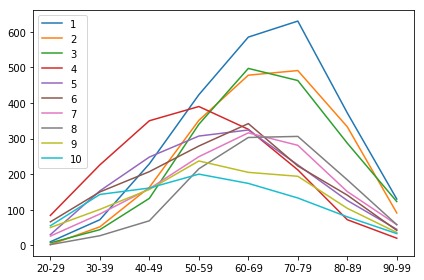

In [8]:
import matplotlib.pyplot as plt
for i in range(1, 11):
    index_string = str(i)
    plt.plot(df[index_string], label=index_string)
plt.xticks(range(8), df['Age Group'])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Get Data
To find the most together occurring diseases, we used a join between the transcript and patient table. Hereby we used the different icd codes as join keys to avoid two times the same diseases as result set.

In [26]:
# Task 2
query = \
'''
    SELECT firstICD9 as "First Disease", secondICD9 as "Second Disease", count(*) as "Appearences"
    FROM
      (SELECT diagnosis.ICD9CODE as firstICD9, transcript.VISITYEAR, diagnosis.PATIENTGUID
        FROM "Diagnosis" as diagnosis
        INNER JOIN "Transcript" as transcript
        ON diagnosis.PATIENTGUID = transcript.PATIENTGUID
        GROUP BY diagnosis.ICD9CODE, diagnosis.PATIENTGUID, transcript.VISITYEAR) as first
    INNER JOIN
      (SELECT diagnosis.ICD9CODE as secondICD9, transcript.VISITYEAR, diagnosis.PATIENTGUID
        FROM "Diagnosis" as diagnosis
        INNER JOIN "Transcript" as transcript
        ON diagnosis.PATIENTGUID = transcript.PATIENTGUID
        GROUP BY diagnosis.ICD9CODE, diagnosis.PATIENTGUID, transcript.VISITYEAR) as second
    ON firstICD9 < secondICD9 AND first.VISITYEAR = second.VISITYEAR AND first.PATIENTGUID = second.PATIENTGUID
    GROUP BY firstICD9, secondICD9
    ORDER BY "Appearences" DESC
    LIMIT 10;
'''

cursor.execute(query)
appear_together = cursor.fetchall()

df = pd.DataFrame(appear_together)
df.columns = ['First Disease', 'Second Disease', 'Total']
df

,First Disease,Second Disease,Total
0,272.2,401.1,2387
1,272.2,401.9,1507
2,272.2,724.2,1380
3,272.2,466.0,1266
4,272.2,V70.0,1175
5,272.4,401.9,1162
6,272.2,530.81,1101
7,401.1,724.2,1030
8,466.0,V70.0,1009
9,466.0,786.2,992


# Get Data
This query is very similar to the one before. We now just round the icd codes to build bigger groups.

In [7]:
# Task 2 (Code Ranges)
query = \
'''
    SELECT firstICD9 as "First Disease", secondICD9 as "Second Disease", count(*) as "Appearences"
    FROM
      (SELECT (CASE
                WHEN LOCATE(diagnosis.ICD9CODE, '.') > 0 THEN LEFT(diagnosis.ICD9CODE, LOCATE(diagnosis.ICD9CODE, '.') - 1)
                ELSE diagnosis.ICD9CODE
              END) as firstICD9, transcript.VISITYEAR, diagnosis.PATIENTGUID
        FROM "Diagnosis" as diagnosis
        INNER JOIN "Transcript" as transcript
        ON diagnosis.PATIENTGUID = transcript.PATIENTGUID
        GROUP BY diagnosis.ICD9CODE, diagnosis.PATIENTGUID, transcript.VISITYEAR) as first
    INNER JOIN
      (SELECT (CASE
                WHEN LOCATE(diagnosis.ICD9CODE, '.') > 0 THEN LEFT(diagnosis.ICD9CODE, LOCATE(diagnosis.ICD9CODE, '.') - 1)
                ELSE diagnosis.ICD9CODE
              END) as secondICD9, transcript.VISITYEAR, diagnosis.PATIENTGUID
        FROM "Diagnosis" as diagnosis
        INNER JOIN "Transcript" as transcript
        ON diagnosis.PATIENTGUID = transcript.PATIENTGUID
        GROUP BY diagnosis.ICD9CODE, diagnosis.PATIENTGUID, transcript.VISITYEAR) as second
    ON firstICD9 < secondICD9 AND first.VISITYEAR = second.VISITYEAR AND first.PATIENTGUID = second.PATIENTGUID
    GROUP BY firstICD9, secondICD9
    ORDER BY "Appearences" DESC
    LIMIT 10;
'''

cursor.execute(query)
appear_together = cursor.fetchall()

df = pd.DataFrame(appear_together)
df.columns = ['First Disease', 'Second Disease', 'Total']
df

,First Disease,Second Disease,Total
0,272,401,9012
1,272,780,4953
2,401,780,4710
3,780,786,4070
4,272,724,3902
5,272,786,3826
6,401,724,3752
7,401,786,3665
8,724,780,3548
9,272,477,3139


# Get Data
Our last query is using the icd ranges as resulting tuples instead of the icd codes shown in the previous queries.

In [8]:
# Task 3
query = \
'''
    SELECT firstICD9 as "First Disease", secondICD9 as "Second Disease", count(*) as "Appearences"
    FROM
      (SELECT (CASE
                WHEN LOCATE(UPPER(diagnosis.ICD9CODE), 'V') > 0 THEN 'V'
                WHEN LOCATE(UPPER(diagnosis.ICD9CODE), 'E') > 0 THEN 'E'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 0 AND 139 THEN '0-139'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 140 AND 239 THEN '140-239'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 240 AND 279 THEN '240-279'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 280 AND 289 THEN '280-289'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 290 AND 319 THEN '290-319'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 320 AND 389 THEN '320-389'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 390 AND 459 THEN '390-459'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 460 AND 519 THEN '460-519'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 520 AND 579 THEN '520-579'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 580 AND 629 THEN '580-629'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 630 AND 679 THEN '630-679'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 680 AND 709 THEN '680-709'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 710 AND 739 THEN '710-739'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 740 AND 759 THEN '740-759'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 760 AND 779 THEN '760-779'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 780 AND 799 THEN '780-799'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 800 AND 999 THEN '800-999'
                ELSE diagnosis.ICD9CODE
              END) as firstICD9, transcript.VISITYEAR, diagnosis.PATIENTGUID
        FROM "Diagnosis" as diagnosis
        INNER JOIN "Transcript" as transcript
        ON diagnosis.PATIENTGUID = transcript.PATIENTGUID
        GROUP BY diagnosis.ICD9CODE, diagnosis.PATIENTGUID, transcript.VISITYEAR) as first
    INNER JOIN
      (SELECT (CASE
                WHEN LOCATE(UPPER(diagnosis.ICD9CODE), 'V') > 0 THEN 'V'
                WHEN LOCATE(UPPER(diagnosis.ICD9CODE), 'E') > 0 THEN 'E'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 0 AND 139 THEN '0-139'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 140 AND 239 THEN '140-239'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 240 AND 279 THEN '240-279'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 280 AND 289 THEN '280-289'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 290 AND 319 THEN '290-319'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 320 AND 389 THEN '320-389'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 390 AND 459 THEN '390-459'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 460 AND 519 THEN '460-519'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 520 AND 579 THEN '520-579'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 580 AND 629 THEN '580-629'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 630 AND 679 THEN '630-679'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 680 AND 709 THEN '680-709'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 710 AND 739 THEN '710-739'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 740 AND 759 THEN '740-759'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 760 AND 779 THEN '760-779'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 780 AND 799 THEN '780-799'
                WHEN CAST(CAST(diagnosis.ICD9CODE as FLOAT) as INT) BETWEEN 800 AND 999 THEN '800-999'
                ELSE diagnosis.ICD9CODE
              END) as secondICD9, transcript.VISITYEAR, diagnosis.PATIENTGUID
        FROM "Diagnosis" as diagnosis
        INNER JOIN "Transcript" as transcript
        ON diagnosis.PATIENTGUID = transcript.PATIENTGUID
        GROUP BY diagnosis.ICD9CODE, diagnosis.PATIENTGUID, transcript.VISITYEAR) as second
    ON firstICD9 < secondICD9 AND first.VISITYEAR = second.VISITYEAR AND first.PATIENTGUID = second.PATIENTGUID
    GROUP BY firstICD9, secondICD9
    ORDER BY "Appearences" DESC
    LIMIT 10;
'''

cursor.execute(query)
appear_together_among_icd9_codes = cursor.fetchall()

df = pd.DataFrame(appear_together_among_icd9_codes)
df.columns = ['First Disease', 'Second Disease', 'Total']
df

,First Disease,Second Disease,Total
0,710-739,780-799,69489
1,460-519,780-799,67385
2,240-279,780-799,50865
3,460-519,710-739,46404
4,390-459,780-799,44434
5,240-279,710-739,39221
6,780-799,V,37964
7,320-389,780-799,35958
8,390-459,710-739,35637
9,240-279,390-459,35459
